In [1]:
# Load data

In [2]:
import pandas as pd
import numpy as np
import os
from typing import Dict, List

In [3]:
dataset = pd.read_csv(filepath_or_buffer="../data/archive/resume_data.csv", sep=",")

In [4]:
dataset.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [5]:
dataset.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Job description data

In [6]:
job_description_data = dataset[['﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required']]

In [7]:
job_description_data['job_position_name'] = job_description_data['﻿job_position_name']
job_description_data.drop(columns=['﻿job_position_name'])

/tmp/ipykernel_10882/2275890743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_description_data['job_position_name'] = job_description_data['﻿job_position_name']


,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,job_position_name
0,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,Senior Software Engineer
1,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,Machine Learning (ML) Engineer
2,Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,"Executive/ Senior Executive- Trade Marketing, ..."
3,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,Business Development Executive
4,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,Senior iOS Engineer
...,...,...,...,...,...,...
9539,Bachelor of Science (BSc),5 to 8 years,NaN,Data Platform Design\nData Pipeline Developmen...,Azure\nBig Data\nData Analytics\nETL Tools\nPo...,Data Engineer
9540,Bachelor of Science (BSc) in Computer Science ...,3 to 5 years,Age at most 40 years,Hardware & Software Installation\nSystem Monit...,NaN,Executive/ Sr. Executive -IT
9541,BBA in Accounting and Finance,1 to 3 years,NaN,Mushak Forms Maintenance\nVAT Software & MS Of...,VAT and Tax,Executive - VAT
9542,Bachelor/Honors,At least 5 years,Age at least 28 years,Administrative Support\nScheduling\nFiling & D...,•Administration\n•Health Safety and Environmen...,Asst. Manager/ Manger (Administrative)


Análise de Múltiplas Componentes (AMC)

In [8]:
import prince 

dataset2MCA = dataset.drop(columns=["address", "company_urls", "online_links", "extra_curricular_organization_links", "matched_score"])
dataset2MCA = dataset2MCA.astype(str)

mca = prince.MCA(n_components=-1, n_iter=10, random_state=42)
mca_result = mca.fit(dataset2MCA)

# obtain inertia to plot
mca_result

MCA(n_components=-1, random_state=42)

In [9]:
contrib = mca_result.column_contributions_.copy()
contrib

,0,1,2,3,4,5,6,7
"career_objective_A Data Science enthusiast with a demonstrated history of working in Banking industry. Currently working on real life Data Science projects with interest in Predictive Analytics, Machine Learning and Deep Learning.",9.388394e-07,6.827022e-06,1.499818e-07,3.601040e-06,1.299710e-06,3.824448e-05,1.680151e-06,1.302764e-05
"career_objective_A Fresher Seeking Roles In Machine Learning, Business Analysis, Data Predictive Modelling, Statistical Solutions, Data Mining.",9.385384e-07,1.436999e-05,4.608463e-08,3.227189e-07,1.277011e-06,3.017371e-05,6.812112e-07,3.365069e-05
"career_objective_A Software Designer Internship with a client-driven corporation leading the field of wireless communication, where outstanding success in team projects, involving design and implementation of software, as well as proven ability to deliver high quality projects on-time will contribute to the implementation, testing and support of innovative wireless products.",5.953287e-08,2.112673e-06,7.310411e-07,2.983841e-06,1.363245e-06,1.415219e-06,2.555456e-06,2.728365e-05
"career_objective_A business management graduate with significant experience in disability services, human resources and finance department; seeking to apply my abilities to position in a human resource department. Proven ability to deal with multiple tasks efficiently and maintain organization.",9.829556e-07,4.024555e-06,3.155066e-07,6.932367e-09,9.172497e-06,8.146137e-06,3.148691e-06,6.540392e-09
"career_objective_A challenging position in a Manufacturing, Engineering, or Research & Development environment where my overall technical background, along with my leadership and decision making capabilities will be combined to contribute to company goals, enlargement, & productivity.",8.527529e-07,1.978203e-06,2.354214e-06,1.883361e-06,1.249716e-05,2.955476e-05,7.329994e-06,7.834663e-07
...,...,...,...,...,...,...,...,...
skills_required_Python\nR or Java\nTensorFlow\nPyTorch\nScikit-learn.,2.876664e-10,1.064958e-11,3.801062e-09,3.910641e-12,8.304442e-09,1.294707e-08,2.673444e-08,8.549136e-08
skills_required_VAT and Tax,1.794864e-09,5.572476e-10,7.949212e-09,2.402029e-09,1.749292e-08,3.863283e-08,2.455255e-08,5.391968e-08
skills_required_iOS\niOS App Developer\niOS Application Development\niOS Development\nMobile apps Developer (iOS)\nNative IOS\nSwift (iOS)\nSwift UI,7.499799e-12,4.150303e-10,9.724869e-12,2.378496e-08,4.493225e-08,1.303765e-08,4.656227e-08,5.554042e-07
skills_required_nan,4.736470e-09,9.221531e-10,2.189427e-08,2.275349e-09,3.801500e-08,2.434094e-08,4.838503e-08,4.689375e-07


In [10]:
import numpy as np

eigenvalues = np.array(mca.eigenvalues_)
explained_inertia = eigenvalues / eigenvalues.sum()

print(explained_inertia)


[0.14289782 0.13029135 0.12898162 0.12380807 0.12172013 0.11973166
 0.11674531 0.11582405]


In [11]:
contrib[0].sort_values(ascending=False).head(10)


major_field_of_studies_['Electrical Engineering Specialized in Computer Science', 'N/A', 'N/A']                                                                                                                                                                                   0.048905
related_skils_in_job_[['NLP', 'Web Scraping', 'bs4', 'LDA Topic Modeling'], ['OCR', 'Pytesseract', 'NER Text Classification']]                                                                                                                                                    0.048905
professional_company_names_['Genisup India Pvt. Ltd.', 'VUGS Technologies']                                                                                                                                                                                                       0.048905
career_objective_Energetic, innovative engineering undergraduate, passionate about Machine Learning, NLP and Deep Learning for solving real-world probl

In [12]:
contrib[1].sort_values(ascending=False).head(10)

expiry_dates_[None, None, None]                                                                                                                 0.035227
extra_curricular_organization_names_['Philadelphia Tri-Chapter of National Association of Hispanic Real Estate Professionals (NAHREP)']         0.034509
start_dates_['Aug. 11, 2003', None, 'Oct. 1, 2012', 'May 21, 2007']                                                                             0.034509
languages_['English', 'French', 'Spanish']                                                                                                      0.034509
major_field_of_studies_['Pharmacy Technician', None, None]                                                                                      0.034509
issue_dates_[None, None, None]                                                                                                                  0.034509
educational_institution_name_['Delaware Technical Community College', "St. Joseph'

In [13]:
def find_original_column(category_name, columns):
    for col in columns:
        if category_name.startswith(col + "_"):
            return col
    return None


In [14]:


contrib["variable"] = [
    find_original_column(idx, dataset.columns)
    for idx in contrib.index
]


variable_contrib = contrib.groupby("variable").sum()

variable_contrib["total_contribution"] = variable_contrib.sum(axis=1)

variable_contrib = variable_contrib.sort_values(
    by="total_contribution",
    ascending=False
)

print(variable_contrib)

                                                0             1             2  \
variable                                                                        
skills                               5.135066e-02  5.631847e-02  5.689027e-02   
start_dates                          5.134483e-02  5.627818e-02  5.687923e-02   
positions                            5.133711e-02  5.627748e-02  5.688228e-02   
end_dates                            5.133492e-02  5.517181e-02  5.686582e-02   
educational_institution_name         5.134861e-02  5.631327e-02  5.684763e-02   
major_field_of_studies               5.128186e-02  5.614961e-02  5.673830e-02   
related_skils_in_job                 5.115591e-02  5.504134e-02  5.544357e-02   
degree_names                         5.120270e-02  5.502486e-02  5.628742e-02   
extra_curricular_organization_names  5.043567e-02  5.334075e-02  5.574540e-02   
passing_years                        5.099669e-02  5.358958e-02  2.495053e-02   
role_positions              

In [15]:
variable_contrib = variable_contrib.div(
    variable_contrib.sum(axis=0),
    axis=1
)

print(variable_contrib)

                                                0             1             2  \
variable                                                                        
skills                               5.135066e-02  5.631847e-02  5.689027e-02   
start_dates                          5.134483e-02  5.627818e-02  5.687923e-02   
positions                            5.133711e-02  5.627748e-02  5.688228e-02   
end_dates                            5.133492e-02  5.517181e-02  5.686582e-02   
educational_institution_name         5.134861e-02  5.631327e-02  5.684763e-02   
major_field_of_studies               5.128186e-02  5.614961e-02  5.673830e-02   
related_skils_in_job                 5.115591e-02  5.504134e-02  5.544357e-02   
degree_names                         5.120270e-02  5.502486e-02  5.628742e-02   
extra_curricular_organization_names  5.043567e-02  5.334075e-02  5.574540e-02   
passing_years                        5.099669e-02  5.358958e-02  2.495053e-02   
role_positions              

In [16]:
threshold = 0.01
selected_vars = variable_contrib[
    variable_contrib["total_contribution"] > threshold
].index


dataset_filtered = dataset[selected_vars]


In [17]:
cum = variable_contrib["total_contribution"].cumsum()
cum /= cum.iloc[-1]

selected_vars = cum[cum <= 0.8].index


Variáveis de maior relevância

In [18]:
selected_vars

Index(['skills', 'start_dates', 'positions', 'end_dates',
       'educational_institution_name', 'major_field_of_studies',
       'related_skils_in_job', 'degree_names',
       'extra_curricular_organization_names', 'passing_years',
       'role_positions', 'extra_curricular_activity_types',
       'educational_results', 'certification_providers', 'result_types'],
      dtype='object', name='variable')

Dataset filtrado

In [19]:
dataset_filtered = dataset[selected_vars]


In [20]:
dataset_filtered = dataset[selected_vars].astype(str)

mca_filtered = prince.MCA(
    n_components=2,
    random_state=42
)

mca_filtered = mca_filtered.fit(dataset_filtered)


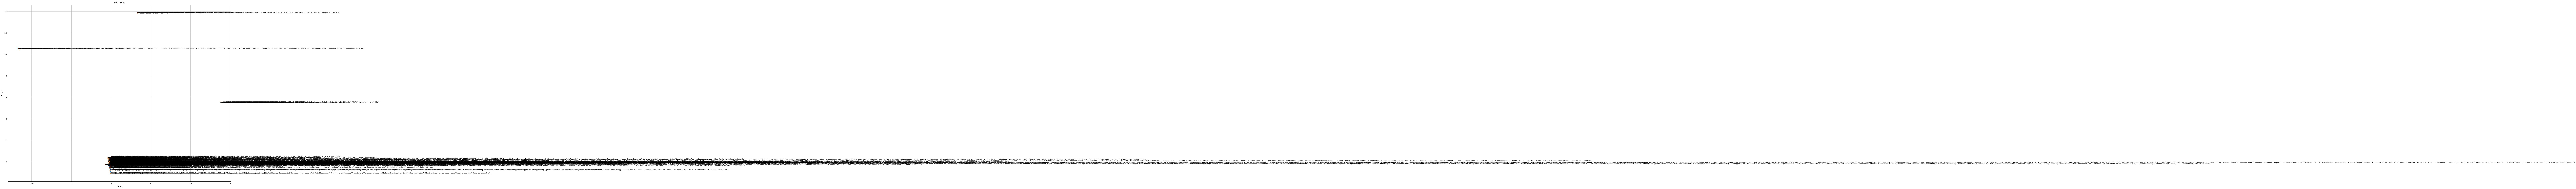

In [21]:
row_coords = mca_filtered.row_coordinates(dataset_filtered)
col_coords = mca_filtered.column_coordinates(dataset_filtered)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))

# currículos
plt.scatter(row_coords[0], row_coords[1], alpha=0.4)

# categorias
plt.scatter(col_coords[0], col_coords[1], marker='x')

for i, label in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i,0],
             col_coords.iloc[i,1],
             label,
             fontsize=8)

plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.title("MCA Map")
plt.grid(True)

plt.show()


In [22]:
dataset.nunique().sort_values(ascending=False).head(20)


matched_score                          345
skills                                 340
educational_institution_name           328
positions                              301
related_skils_in_job                   298
start_dates                            252
end_dates                              246
major_field_of_studies                 210
professional_company_names             199
degree_names                           180
career_objective                       171
passing_years                          149
role_positions                          91
extra_curricular_organization_names     89
locations                               86
extra_curricular_activity_types         86
educational_results                     78
certification_providers                 49
certification_skills                    32
result_types                            30
dtype: int64

Candidate data

In [23]:
candidates_data = dataset.drop(columns=['﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required'])
candidates_data.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', 'matched_score'],
      dtype='object')

In [24]:
def normalize_text(text):
    return str(text).strip().lower() 


In [25]:
def normalize_list(value):
    if pd.isna(value):
        return []

    if isinstance(value, list):
        return [normalize_text(v) for v in value]

    return [normalize_text(value)]


In [26]:
from typing import List, Dict

def unstructure_candidate_data2json(
    df: pd.DataFrame
) -> List[Dict]:

    structured_data = []

    for _, row in df.iterrows():

        candidate = {
            "skills": normalize_text(row.get("skills", "")),
            "start_dates": normalize_text(row.get("start_dates", "")),
            "end_dates": normalize_text(row.get("end_dates", "")),
            "positions": normalize_text(row.get("positions", "")),
            "role_positions": normalize_text(row.get("role_positions", "")),

            "education": {
                "institution": normalize_text(
                    row.get("educational_institution_name", "")
                ),
                "degree": normalize_text(
                    row.get("degree_names", "")
                ),
                "major": normalize_text(
                    row.get("major_field_of_studies", "")
                ),
                "passing_year": normalize_text(
                    row.get("passing_years", "")
                ),
                "result": normalize_text(
                    row.get("educational_results", "")
                ),
                "result_type": normalize_text(
                    row.get("result_types", "")
                ),
            },

            "experience_alignment": normalize_text(
                row.get("related_skils_in_job", "")
            ),

            "extra_activity": {
                "organization": normalize_text(
                    row.get("extra_curricular_organization_names", "")
                ),
                "activity_type": normalize_text(
                    row.get("extra_curricular_activity_types", "")
                ),
            },

            "certifications": normalize_text(
                row.get("certification_providers", "")
            )
        }

        structured_data.append(candidate)

    return structured_data


In [27]:
def build_profile_text(profile):

    parts = []

    for key, value in profile.items():

        if isinstance(value, dict):
            for sub_k, sub_v in value.items():
                if sub_v:
                    parts.append(f"{sub_k}: {sub_v}")
        else:
            if value:
                parts.append(f"{key}: {value}")

    return " ".join(parts)



In [28]:
structured_candidate_dataset = unstructure_candidate_data2json(candidates_data)


candidate_texts = [
    build_profile_text(c)
    for c in structured_candidate_dataset
]

In [29]:
candidate_texts

["skills: ['big data', 'hadoop', 'hive', 'python', 'mapreduce', 'spark', 'java', 'machine learning', 'cloud', 'hdfs', 'yarn', 'core java', 'data science', 'c++', 'data structures', 'dbms', 'rdbms', 'informatica', 'talend', 'amazon redshift', 'microsoft azure'] start_dates: ['nov 2019'] end_dates: ['till date'] positions: ['big data analyst'] role_positions: nan institution: ['the amity school of engineering & technology (aset), noida'] degree: ['b.tech'] major: ['electronics'] passing_year: ['2019'] result: ['n/a'] result_type: [none] experience_alignment: [['big data']] organization: nan activity_type: nan certifications: nan",
 "skills: ['data analysis', 'data analytics', 'business analysis', 'r', 'sas', 'powerbi', 'tableau', 'data visualization', 'business analytics', 'machine learning'] start_dates: ['sep 2019'] end_dates: ['till date'] positions: ['business analyst'] role_positions: nan institution: ['delhi university - hansraj college', 'delhi university - hansraj college'] degre

In [31]:
def unstructure_job_description2json(
    df: pd.DataFrame
) -> List[Dict]:

    structured_data = []

    for _, row in df.iterrows():

        job_profile = {

            "skills": normalize_list(
                row.get("skills_required", [])
            ),

            "positions": normalize_text(
                row.get("job_position_name", "")
            ),

            "role_positions": normalize_text(
                row.get("job_position_name", "")
            ),

            "experience_alignment": normalize_text(
                row.get("responsibilities.1", "")
            ),

            "education": {
                "degree": normalize_text(
                    row.get("educationaL_requirements", "")
                ),
                "major": normalize_text(
                    row.get("educationaL_requirements", "")
                ),
            },

            # proxies estruturais
            "start_dates": normalize_text(
                row.get("experiencere_requirement", "")
            ),
            "end_dates": normalize_text(
                row.get("experiencere_requirement", "")
            ),

            # campos inexistentes → neutros
            "educational_results": "",
            "result_types": "",
            "passing_years": "",
            "extra_curricular_organization_names": "",
            "extra_curricular_activity_types": "",
            "certification_providers": ""
        }

        structured_data.append(job_profile)

    return structured_data


In [32]:
job_description_data_structured = unstructure_job_description2json(df=job_description_data)


job_texts = [
    build_profile_text(j)
    for j in job_description_data_structured
]


In [33]:
job_description_data_structured

[{'skills': [],
  'positions': 'senior software engineer',
  'role_positions': 'senior software engineer',
  'experience_alignment': 'technical support\ntroubleshooting\ncollaboration\ndocumentation\nsystem monitoring\nsoftware deployment\ntraining & mentorship\nindustry trends\nfield visits',
  'education': {'degree': 'b.sc in computer science & engineering from a reputed university.',
   'major': 'b.sc in computer science & engineering from a reputed university.'},
  'start_dates': 'at least 1 year',
  'end_dates': 'at least 1 year',
  'educational_results': '',
  'result_types': '',
  'passing_years': '',
  'extra_curricular_organization_names': '',
  'extra_curricular_activity_types': '',
  'certification_providers': ''},
 {'skills': [],
  'positions': 'machine learning (ml) engineer',
  'role_positions': 'machine learning (ml) engineer',
  'experience_alignment': 'machine learning leadership\ncross-functional collaboration\nstrategy development\nml/nlp infrastructure\nprototype tr

Similaridade entre os vetores

In [56]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
sentence_model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2", device="cuda")

In [57]:
# Obter os embeddings

embeddings_candidate_dataset = sentence_model.encode(structured_candidate_dataset)

In [58]:
embeddings_candidate_dataset.shape

(9544, 768)

In [59]:
embeddings_job_description_dataset = sentence_model.encode(job_description_data_structured)

In [60]:
embeddings_job_description_dataset.shape

(9544, 768)

Similaridade entre os embeddings

In [61]:
similarity_matrix = sentence_model.similarity(embeddings_candidate_dataset, embeddings_job_description_dataset)

In [62]:
similarity_matrix.shape

torch.Size([9544, 9544])

In [63]:
similarity_matrix.diagonal()

tensor([0.0903, 0.0585, 0.3250,  ..., 0.1687, 0.2870, 0.2071])

In [64]:
predicted = similarity_matrix.diagonal()
ground_truth = np.array(dataset['matched_score']).flatten()


In [65]:
print(f"Predicted: {predicted.shape}")
print(f"ground_truth: {ground_truth.shape}")

Predicted: torch.Size([9544])
ground_truth: (9544,)


In [66]:
from scipy.stats import pearsonr, spearmanr

pearsonr(predicted, ground_truth)

PearsonRResult(statistic=-0.05419035672215892, pvalue=1.1756677329000416e-07)

In [67]:
spearmanr(predicted, ground_truth)

SignificanceResult(statistic=-0.04997003082986631, pvalue=1.0387393044713346e-06)

Criação das features 

In [68]:
import numpy as np

def build_matching_features(cand_embs, job_embs):

    diff = np.abs(cand_embs - job_embs)
    prod = cand_embs * job_embs

    features = np.concatenate(
        [cand_embs, job_embs, diff, prod],
        axis=1
    )

    return features


In [69]:
X = build_matching_features(embeddings_candidate_dataset,
                            embeddings_job_description_dataset)

y = dataset["matched_score"].values


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [49]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
from scipy.stats import pearsonr, spearmanr

preds = model.predict(X_test)

print("Pearson:", pearsonr(preds, y_test))
print("Spearman:", spearmanr(preds, y_test))


Pearson: PearsonRResult(statistic=0.8055091487103975, pvalue=0.0)
Spearman: SignificanceResult(statistic=0.806330820493149, pvalue=0.0)


# Salvar o modelo de Recomendação

In [51]:
import pickle


with open('../config/xgboost_regressor_model.pkl', 'wb') as f:
    pickle.dump(model, f)


# Carregar o modelo treinado

In [84]:
with open('../config/xgboost_regressor_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

Recomendação de vagas por candidato

In [73]:
candidate_profile = unstructure_candidate_data2json(candidates_data)[0]

candidate_text = build_profile_text(candidate_profile)
candidate_text

"skills: ['big data', 'hadoop', 'hive', 'python', 'mapreduce', 'spark', 'java', 'machine learning', 'cloud', 'hdfs', 'yarn', 'core java', 'data science', 'c++', 'data structures', 'dbms', 'rdbms', 'informatica', 'talend', 'amazon redshift', 'microsoft azure'] start_dates: ['nov 2019'] end_dates: ['till date'] positions: ['big data analyst'] role_positions: nan institution: ['the amity school of engineering & technology (aset), noida'] degree: ['b.tech'] major: ['electronics'] passing_year: ['2019'] result: ['n/a'] result_type: [none] experience_alignment: [['big data']] organization: nan activity_type: nan certifications: nan"

Gerar o vetor do candidato

In [75]:
candidate_embedding = sentence_model.encode(
    [candidate_text],
    normalize_embeddings=True
)[0]


Matrix entre o candidato e as vagas

In [77]:
import numpy as np

candidate_matrix = np.repeat(
    candidate_embedding.reshape(1, -1),
    len(embeddings_job_description_dataset),
    axis=0
)


In [ ]:
X_pairs = build_matching_features(candidate_matrix, embeddings_job_description_dataset)


In [91]:
X_inference = pd.DataFrame(X_pairs)


In [92]:
scores = xgb_model.predict(X_inference)


In [ ]:

jobs_df = job_description_data.reset_index(drop=True)

jobs_df["job_id"] = [
    f"job_{i}" for i in range(len(jobs_df))
]

candidate_score = pd.DataFrame({
    "job_id": jobs_df["job_id"].values,
    "job_position_name": jobs_df["job_position_name"],
    "score": scores
}).sort_values(by="score", ascending=False)


In [105]:
candidate_score

,job_id,job_position_name,score
0,job_0,Senior Software Engineer,0.640223
1,job_1,Machine Learning (ML) Engineer,0.696072
2,job_2,"Executive/ Senior Executive- Trade Marketing, ...",0.590711
3,job_3,Business Development Executive,0.415186
4,job_4,Senior iOS Engineer,0.676743
...,...,...,...
9539,job_9539,Data Engineer,0.656521
9540,job_9540,Executive/ Sr. Executive -IT,0.696072
9541,job_9541,Executive - VAT,0.554890
9542,job_9542,Asst. Manager/ Manger (Administrative),0.679575
